In [ ]:
import nltk
import string
from collections import Counter
import matplotlib.pyplot as plt

In [ ]:
!pip install GetOldTweets3

In [ ]:
import GetOldTweets3 as got
def get_tweets(keyword,start,end,mxm):
    tweet_criteria=got.manager.TweetCriteria().setQuerySearch(keyword).setSince(start).setUntil(end)\
    .setMaxTweets(mxm)
    tweets=got.manager.TweetManager.getTweets(tweet_criteria)
    text=[[tweet.text] for tweet in tweets]
    return text

In [ ]:
before=get_tweets('corona virus', '2020-01-01','2020-02-01',500)
before

[['Me veré muy dramático si a partir del lunes uso mascarilla para ir a u? #coronavirus'],
 ['Unless Corona virus cancels the league #Dreamcatcher'],
 ['I told a few dumb liberals that the Corona virus was coming from Mexico. Now they want to build the wall.'],
 ['Many travel companies are limiting their operations to reduce the impact of the coronavirus outbreak on their financials while helping to safeguard public health. '],
 ['Les endroits publics à forte densité chinoise tel les bibliothèques comme à #Brossard devrait être interdit d’accès s’ils ont été en chine lors des derniers 15 voir 30 jours. #Coronavirus CC : #DoreenAssaad @Ad_Assaad'],
 ['Nose que es peor si el coronavirus o el Efecto Tusa que afecta a los pendejos de hoy en dia!!! '],
 ['CORONA-VIRUS, should be taken with a slice of LIME '],
 ['Corona virus. '],
 ['Coronavirus, ¿dónde se originó? ¿Tendrá algo que ver con salubridad, higiene, o falta de regulación del gobierno chino? Escucha del tema en reproducción del pro

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
text_before=''
for i in range(0,len(before)):
    text_before=text_before+'. '+before[i][0]
lower=text_before.lower()

cleaned_text=lower.translate(str.maketrans('','',string.punctuation))

from nltk.tokenize import word_tokenize
tokens=word_tokenize(cleaned_text,'english')

In [ ]:
len(tokens)

9117

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import stopwords


In [ ]:
stop_words=stopwords.words('english')
words=[word for word in tokens if word not in stop_words]

In [ ]:
len(words)

6993

In [ ]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
from nltk.stem import WordNetLemmatizer
lemma=[(WordNetLemmatizer().lemmatize(word)) for word in words]

In [ ]:
len(lemma)

6993

In [ ]:
clear_line=''
emotion_list=[]
with open('emotions.txt','r') as file:
    for line in file:
        clear_line=line.replace("\n",'').replace(" ","").replace(","," ").replace("'","").strip()
        word,emotion=clear_line.split(':')
        if word in lemma:
            emotion_list.append(emotion)
            
w=Counter(emotion_list)
print(w)

Counter({'sad': 4, 'angry': 3, 'attracted': 3, 'fearful': 3, 'powerless': 3, 'singledout': 3, 'average': 2, 'free': 1, 'alone': 1, 'lost': 1, 'attached': 1, 'surprise': 1, 'adequate': 1, 'happy': 1, 'loved': 1, 'anxious': 1})


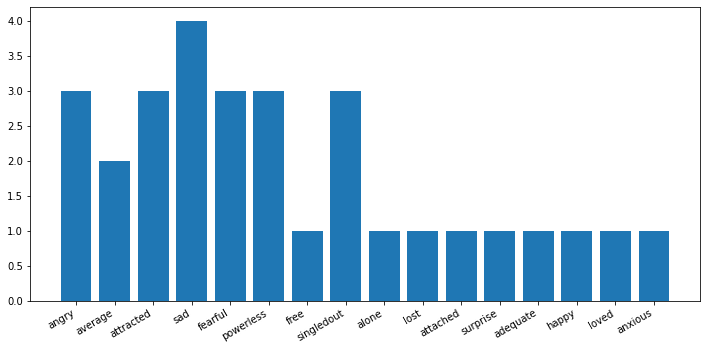

In [ ]:
fig,ax=plt.subplots(figsize=(12,6))
ax.bar(w.keys(),w.values())
fig.autofmt_xdate()
plt.show()

In [ ]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sia=SentimentIntensityAnalyzer()
sia.polarity_scores(cleaned_text)

/usr/local/lib/python3.6/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


{'compound': -1.0, 'neg': 0.113, 'neu': 0.837, 'pos': 0.051}

In [ ]:
# After the outbreak
after=get_tweets('corona virus','2020-02-02','2020-03-03',500)
#after

In [ ]:
text_after=''
for i in range(0,len(after)):
    text_after=text_after+'. '+after[i][0]
lower_after=text_after.lower()

cleaned_after=lower_after.translate(str.maketrans('','',string.punctuation))

words_after=word_tokenize(cleaned_after,'english')

In [ ]:
len(words_after)

10724

In [ ]:
words_as=[word for word in words_after if word not in stop_words]
len(words_as)

7425

In [ ]:
clear_line=''
emotion_list=[]
with open('emotions.txt','r') as file:
    for line in file:
        clear_line=line.replace("\n",'').replace(" ","").replace(","," ").replace("'","").strip()
        word,emotion=clear_line.split(':')
        if word in lemma:
            emotion_list.append(emotion)
            
w1=Counter(emotion_list)
print(w1)

Counter({'sad': 4, 'angry': 3, 'attracted': 3, 'fearful': 3, 'powerless': 3, 'singledout': 3, 'average': 2, 'free': 1, 'alone': 1, 'lost': 1, 'attached': 1, 'surprise': 1, 'adequate': 1, 'happy': 1, 'loved': 1, 'anxious': 1})


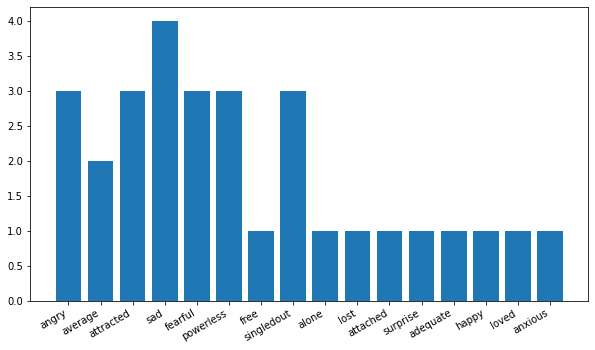

In [ ]:
fig,ax=plt.subplots(figsize=(10,6))
ax.bar(w1.keys(),w1.values())
fig.autofmt_xdate()
plt.show()

In [ ]:
sia=SentimentIntensityAnalyzer()
sia.polarity_scores(cleaned_after)

{'compound': -0.9999, 'neg': 0.112, 'neu': 0.804, 'pos': 0.084}

In [ ]:
#2

In [ ]:
text=''
with open('test.txt','r') as file:
    for line in file:
        text=text+''+line

In [ ]:
text=text.replace('\n',' ')

In [ ]:
lower=text.lower()
cleaned=lower.translate(str.maketrans('?','.',string.punctuation))
tokens=word_tokenize(cleaned,'english')
print(len(tokens))

words=[word for word in tokens if word not in stop_words]
print(len(words))

lemma=[WordNetLemmatizer().lemmatize(word) for word in words]
print(len(lemma))

109
63
63


In [ ]:
cleaned


' sushant singh rajputs demise was a shocking news for the entire nation fans have been suspecting the actors suicide to be a planned murder from urging the government and police for cbi enquiry to debating on nepotism prevailing in bollywood social media has seen a flurry of such hashtags and twitter trends over the past few weeksfans are now claiming that the actors wikipedia page was edited and someone added the information of his suicide much before the actor committed suicide netizens claimed that the wikipedia page of sushant was updated at 859 am when the police actually reached his bandra residence around 1230 pm on 14 june 2020'

In [ ]:
print(lemma)


['sushant', 'singh', 'rajput', 'demise', 'shocking', 'news', 'entire', 'nation', 'fan', 'suspecting', 'actor', 'suicide', 'planned', 'murder', 'urging', 'government', 'police', 'cbi', 'enquiry', 'debating', 'nepotism', 'prevailing', 'bollywood', 'social', 'medium', 'seen', 'flurry', 'hashtags', 'twitter', 'trend', 'past', 'weeksfans', 'claiming', 'actor', 'wikipedia', 'page', 'edited', 'someone', 'added', 'information', 'suicide', 'much', 'actor', 'committed', 'suicide', 'netizens', 'claimed', 'wikipedia', 'page', 'sushant', 'updated', '859', 'police', 'actually', 'reached', 'bandra', 'residence', 'around', '1230', 'pm', '14', 'june', '2020']


In [ ]:
# Get emotions text
emotion_list = []
with open('emotions1.txt', 'r') as file:
    for line in file:
        clear_line = line.replace('\n', '').replace(',', '').replace("'", '').strip()
        word, emotion = clear_line.split(':')
        if word in lemma:
            emotion_list.append(emotion)

w = Counter(emotion_list)
print(w)

Counter({' death': 3, ' enquiry': 3, ' social media': 3, ' bollywood': 2, ' shock': 1, ' suspicious': 1, ' actor': 1})


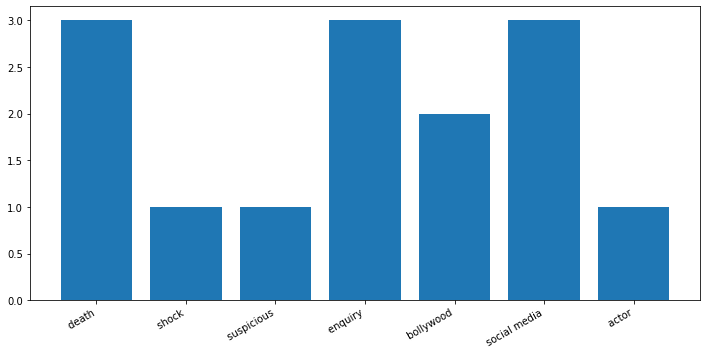

In [ ]:
fig,ax=plt.subplots(figsize=(12,6))
ax.bar(w.keys(),w.values())
fig.autofmt_xdate()
plt.show()


In [ ]:
sia.polarity_scores(cleaned)

{'compound': -0.9686, 'neg': 0.182, 'neu': 0.79, 'pos': 0.028}

In [ ]:
#3

In [ ]:
s1= ['''Sushant Singh Rajputs demise was a shocking news for the entire nation. Fans have been suspecting the actors suicide to be a planned murder. From urging the government and police for CBI enquiry to debating on nepotism prevailing in bollywood, social media has seen a flurry of such hashtags and Twitter trends over the past few weeks.Fans are now claiming that the actors Wikipedia page was edited, and someone added the information of his suicide much before the actor committed suicide.
Netizens claimed that the Wikipedia page of Sushant was updated at 8.59 am, when the police actually reached his Bandra residence around 12:30 pm on 14 June, 2020.''']
s2= ['''The untimely demise of actor Sushant Singh Raput on June 14, which was believed to be by suicide, has opened floodgates of emotions. While some are seeking justice, others are hoping that this incident will put the much-needed attention on mental health. Then there’s a large group that has taken to conspiracy theories behind the alleged murder, ranging from prejudice faced by outsiders in the film industry to blaming SSR’s girlfriend Rhea Chakraborty for abetment to suicide.''']




In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
cvect=CountVectorizer(stop_words=stopwords.words('english'))
cvect.fit_transform(s1)
print(cvect.get_feature_names())

['12', '14', '2020', '30', '59', 'actor', 'actors', 'actually', 'added', 'around', 'bandra', 'bollywood', 'cbi', 'claimed', 'claiming', 'committed', 'debating', 'demise', 'edited', 'enquiry', 'entire', 'fans', 'flurry', 'government', 'hashtags', 'information', 'june', 'media', 'much', 'murder', 'nation', 'nepotism', 'netizens', 'news', 'page', 'past', 'planned', 'pm', 'police', 'prevailing', 'rajputs', 'reached', 'residence', 'seen', 'shocking', 'singh', 'social', 'someone', 'suicide', 'sushant', 'suspecting', 'trends', 'twitter', 'updated', 'urging', 'weeks', 'wikipedia']


In [ ]:
cvect.vocabulary_


{'12': 0,
 '14': 1,
 '2020': 2,
 '30': 3,
 '59': 4,
 'actor': 5,
 'actors': 6,
 'actually': 7,
 'added': 8,
 'around': 9,
 'bandra': 10,
 'bollywood': 11,
 'cbi': 12,
 'claimed': 13,
 'claiming': 14,
 'committed': 15,
 'debating': 16,
 'demise': 17,
 'edited': 18,
 'enquiry': 19,
 'entire': 20,
 'fans': 21,
 'flurry': 22,
 'government': 23,
 'hashtags': 24,
 'information': 25,
 'june': 26,
 'media': 27,
 'much': 28,
 'murder': 29,
 'nation': 30,
 'nepotism': 31,
 'netizens': 32,
 'news': 33,
 'page': 34,
 'past': 35,
 'planned': 36,
 'pm': 37,
 'police': 38,
 'prevailing': 39,
 'rajputs': 40,
 'reached': 41,
 'residence': 42,
 'seen': 43,
 'shocking': 44,
 'singh': 45,
 'social': 46,
 'someone': 47,
 'suicide': 48,
 'sushant': 49,
 'suspecting': 50,
 'trends': 51,
 'twitter': 52,
 'updated': 53,
 'urging': 54,
 'weeks': 55,
 'wikipedia': 56}

In [ ]:
cnew=cvect.transform(s2)
cnew=cnew.toarray()

In [ ]:
import pandas as pd


In [ ]:
rep=pd.DataFrame(cnew,columns=cvect.get_feature_names())
rep

,12,14,2020,30,59,actor,actors,actually,added,around,bandra,bollywood,cbi,claimed,claiming,committed,debating,demise,edited,enquiry,entire,fans,flurry,government,hashtags,information,june,media,much,murder,nation,nepotism,netizens,news,page,past,planned,pm,police,prevailing,rajputs,reached,residence,seen,shocking,singh,social,someone,suicide,sushant,suspecting,trends,twitter,updated,urging,weeks,wikipedia
0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2,1,0,0,0,0,0,0,0


In [ ]:
cnew.sum() #total repetitive words(including that are repeated twice)

10

In [ ]:
cols=rep.columns
dic={}
for col in cols:
    if rep[col].sum()>=1:
        dic[col]=rep[col].sum()
print(dic)

{'14': 1, 'actor': 1, 'demise': 1, 'june': 1, 'much': 1, 'murder': 1, 'singh': 1, 'suicide': 2, 'sushant': 1}


In [ ]:
len(dic.keys()) #total repetitive words

9